# Car Price Prediction
## By: Juan Saracho

In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\sarac\OneDrive\Documents\ANA500\wk1\cars_us_2022.csv')
df.head()

,Unnamed: 0,Brand,Model.Number,Price,Photo,Engine.Type,Body.Type,Fuel.Type,Gearbox.Type,Power.hp,...,CD.Player,DVD.Player,Electric.Adjustable.Seats,Keyless.Entry,Tyre.Pressure.Monitor,Smart.Access.Card.Entry,Xenon.Headlamps,Halogen.Headlamps,Removable.Convertible.Top,Cassette.Player
0,1,Honda,Accord Hybrid Sport-L 2023,31670.0,https://www.ccarprice.com/products/Honda_Accor...,2.0L Inline-4 Hybrid,Sedan,Hybrid,CVT,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Honda,Accord Sedan 2023,28000.0,https://www.ccarprice.com/products/Honda_Accor...,1.5L Turbo Inline-4 Gas,Sedan,Petrol,CVT,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Honda,ZR-V 2023,25000.0,https://www.ccarprice.com/products/Honda_ZRV_2...,2.0L Inline-4,SUV,Petrol,CVT,158.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Honda,HR-V VTi-S 2022,27800.0,https://www.ccarprice.com/products/Honda_HR-V_...,2.0L Inline-4 Gas,SUV,Petrol,CVT,119.0,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Honda,HR-V VTi 2022,26900.0,https://www.ccarprice.com/products/Honda_HR-V_...,2.0L Inline-4 Gas,SUV,Petrol,CVT,119.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2602 non-null   int64  
 1   Brand                              2602 non-null   object 
 2   Model.Number                       2602 non-null   object 
 3   Price                              2602 non-null   float64
 4   Photo                              2602 non-null   object 
 5   Engine.Type                        2527 non-null   object 
 6   Body.Type                          2564 non-null   object 
 7   Fuel.Type                          2602 non-null   object 
 8   Gearbox.Type                       2602 non-null   object 
 9   Power.hp                           2256 non-null   float64
 10  Displacement.l                     2023 non-null   float64
 11  Torque.lbft                        2168 non-null   float

### Choosing our Predictors

In [63]:
# drop categorical variables with too many classes
data = df.iloc[:, 3:22]
data = data.drop(['Photo', 'Engine.Type', 'Body.Type'], axis=1)
data.head(10)

,Price,Fuel.Type,Gearbox.Type,Power.hp,Displacement.l,Torque.lbft,Cylinders,Drivetrain,MPG.City,MPG.Highway,Seats,Doors,Height.in,Length.in,Width.in,Wheelbase.in
0,31670.0,Hybrid,CVT,204.0,2.0,247.0,4.0,front,44.0,41.0,5.0,4.0,57.1,196.1,73.3,111.4
1,28000.0,Petrol,CVT,192.0,1.5,260.0,4.0,front,30.0,38.0,5.0,4.0,57.1,196.1,73.3,111.4
2,25000.0,Petrol,CVT,158.0,2.0,138.0,4.0,front,26.0,32.0,5.0,4.0,63.4,179.8,72.4,104.5
3,27800.0,Petrol,CVT,119.0,2.0,107.0,4.0,front,13.0,15.0,5.0,4.0,64.0,174.0,72.0,104.0
4,26900.0,Petrol,CVT,119.0,2.0,107.0,4.0,front,13.0,15.0,5.0,4.0,64.0,174.0,72.0,104.0
5,25440.0,Petrol,CVT,158.0,2.0,138.0,NaN,front,29.0,37.0,5.0,4.0,55.7,179.0,70.9,107.7
6,29990.0,Petrol,CVT,190.0,1.5,179.0,4.0,front,28.0,34.0,5.0,4.0,66.1,182.1,73.0,104.8
7,65000.0,Electric,Automatic,174.0,NaN,221.0,NaN,front,0.0,0.0,5.0,4.0,58.2,192.7,73.9,108.3
8,46230.0,Petrol,Automatic,280.0,3.5,262.0,6.0,all,18.0,24.0,5.0,4.0,70.8,210.2,78.6,125.2
9,33760.0,Petrol,CVT,190.0,1.5,179.0,4.0,front,28.0,34.0,5.0,4.0,66.2,184.8,73.5,106.3


### Creating Dummy Variables

In [64]:
# categorical feature for dummy variables
cat_vars = ['Fuel.Type', 'Gearbox.Type', 'Drivetrain']

# use pd.get_dummies to create one-hot encoded variables
data = pd.get_dummies(data, columns=cat_vars)

# Main variables
X_base = data.drop('Price', axis=1)
y_base = data['Price']

### Imputing Missing Values with KNN algorithm

In [65]:
# Sum NaN elements
data.isnull().sum()

Price                       0
Power.hp                  346
Displacement.l            579
Torque.lbft               434
Cylinders                 734
MPG.City                  445
MPG.Highway               445
Seats                      20
Doors                      36
Height.in                 144
Length.in                 141
Width.in                  135
Wheelbase.in              148
Fuel.Type_Diesel            0
Fuel.Type_Electric          0
Fuel.Type_Hybrid            0
Fuel.Type_Petrol            0
Fuel.Type_Unknown           0
Gearbox.Type_Automatic      0
Gearbox.Type_CVT            0
Gearbox.Type_Manual         0
Drivetrain_all              0
Drivetrain_front            0
Drivetrain_rear             0
dtype: int64

In [66]:
# Using KNN algorithm to impute NaN values
from sklearn.impute import KNNImputer

# Create the KNNImputer object
imputer = KNNImputer()
df_imputed = imputer.fit_transform(data)

# Convert back to pandas dataframe
df_imputed = pd.DataFrame(df_imputed, columns=data.columns)

# Imputed variables
X = df_imputed.drop('Price', axis=1)
y = df_imputed['Price']

In [67]:
# Sum NaN elements of imputed dataset
df_imputed.isnull().sum()

Price                     0
Power.hp                  0
Displacement.l            0
Torque.lbft               0
Cylinders                 0
MPG.City                  0
MPG.Highway               0
Seats                     0
Doors                     0
Height.in                 0
Length.in                 0
Width.in                  0
Wheelbase.in              0
Fuel.Type_Diesel          0
Fuel.Type_Electric        0
Fuel.Type_Hybrid          0
Fuel.Type_Petrol          0
Fuel.Type_Unknown         0
Gearbox.Type_Automatic    0
Gearbox.Type_CVT          0
Gearbox.Type_Manual       0
Drivetrain_all            0
Drivetrain_front          0
Drivetrain_rear           0
dtype: int64

In [68]:
df_imputed.describe()

,Price,Power.hp,Displacement.l,Torque.lbft,Cylinders,MPG.City,MPG.Highway,Seats,Doors,Height.in,...,Fuel.Type_Electric,Fuel.Type_Hybrid,Fuel.Type_Petrol,Fuel.Type_Unknown,Gearbox.Type_Automatic,Gearbox.Type_CVT,Gearbox.Type_Manual,Drivetrain_all,Drivetrain_front,Drivetrain_rear
count,2.602000e+03,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,...,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,1.701552e+05,361.715296,3.102513,376.892467,5.829285,17.669408,22.786241,4.912759,3.746580,62.821783,...,0.091084,0.051883,0.757494,0.069946,0.815142,0.073021,0.111837,0.477709,0.269792,0.222137
std,6.468884e+05,283.798692,1.510911,511.633310,2.533112,8.715675,10.189975,1.399170,0.888089,8.481828,...,0.287784,0.221834,0.428681,0.255105,0.388257,0.260221,0.315226,0.499599,0.443937,0.415763
min,1.550000e+03,4.000000,0.800000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.237500e+04,189.000000,2.000000,210.000000,4.000000,14.000000,19.000000,5.000000,4.000000,56.900000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.999000e+04,293.000000,2.920000,306.000000,5.600000,18.000000,24.000000,5.000000,4.000000,63.800000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.080000e+04,455.000000,3.900000,468.000000,6.800000,23.000000,29.000000,5.000000,4.000000,67.950000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.500000e+07,6100.000000,9.800000,11500.000000,54.000000,67.000000,59.000000,15.000000,5.000000,153.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualization

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2) # Scale default fonts by two
sns.set_style('whitegrid')

C:\Users\sarac\AppData\Local\Temp\ipykernel_5036\2790978920.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,4.5))


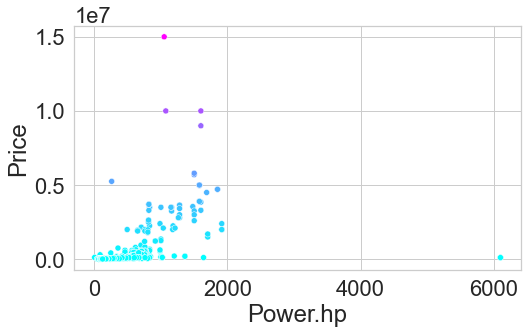

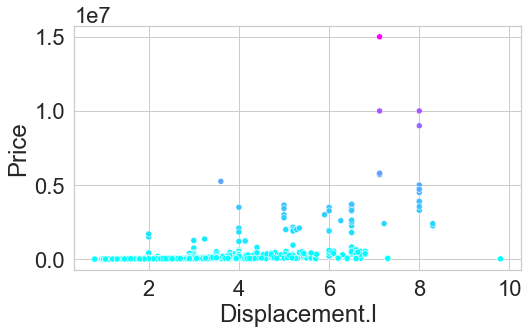

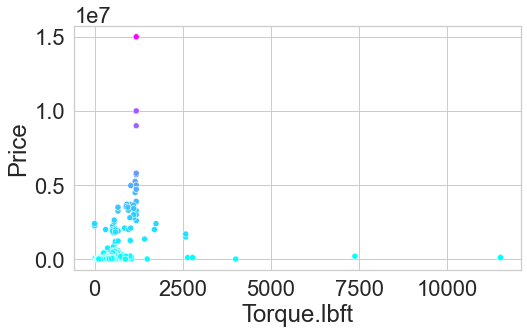

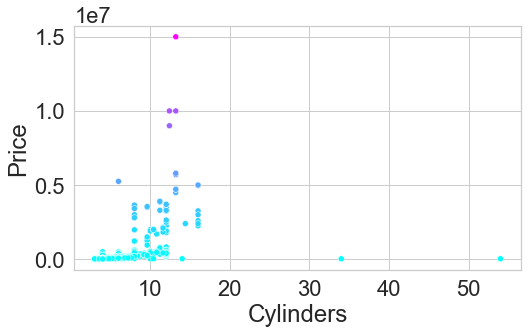

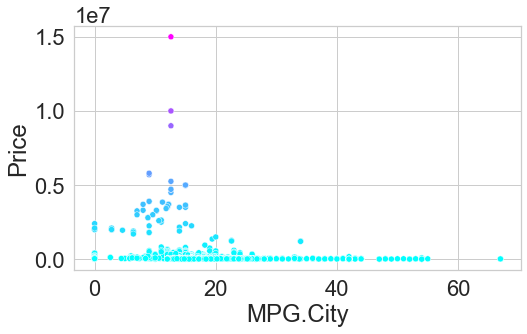

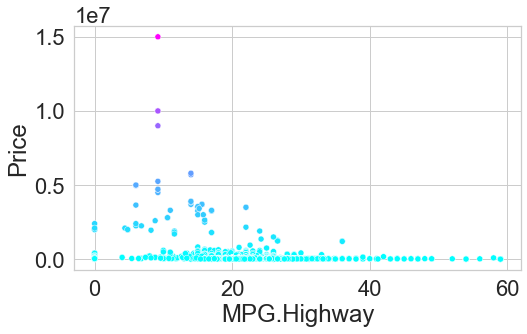

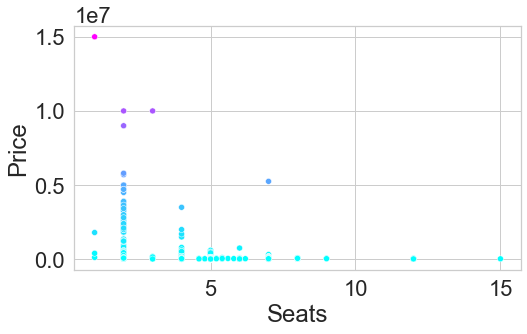

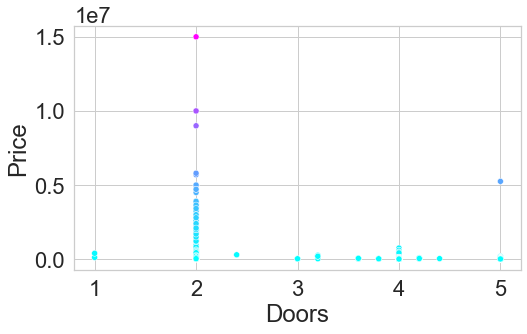

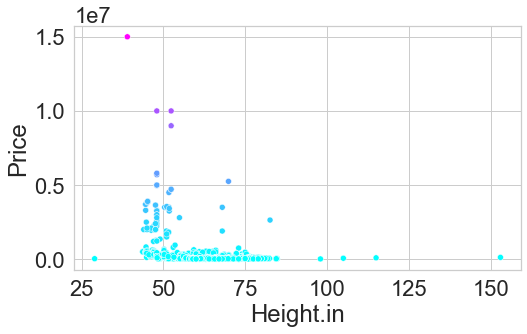

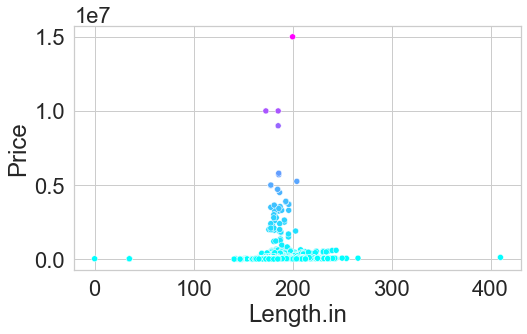

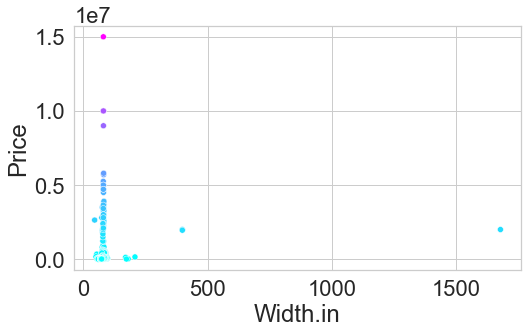

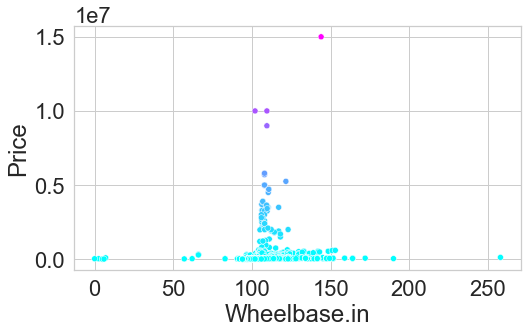

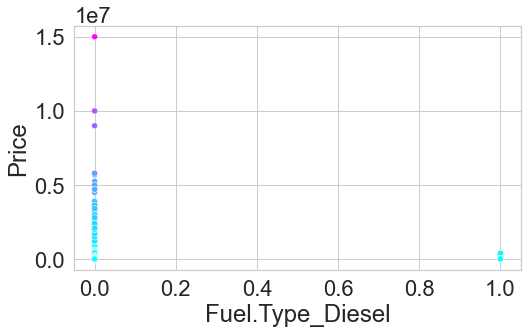

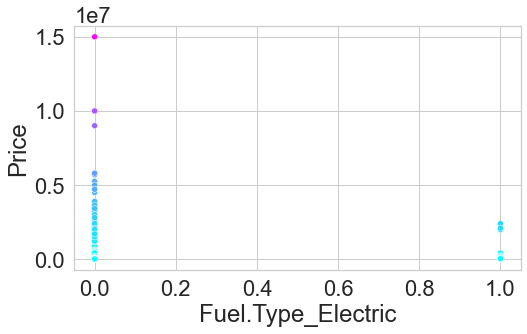

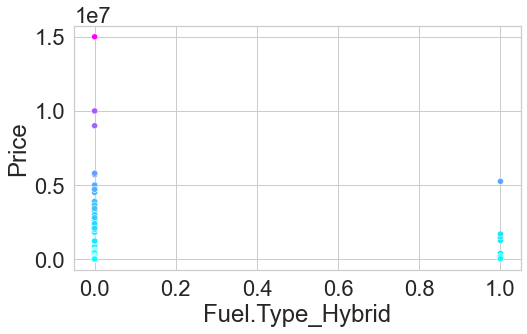

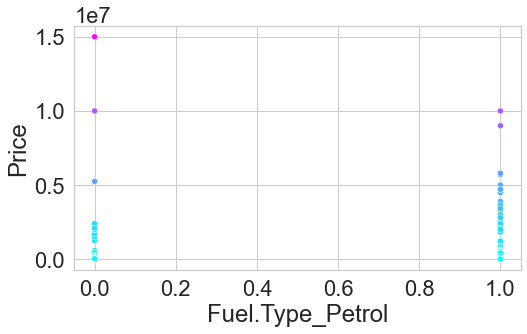

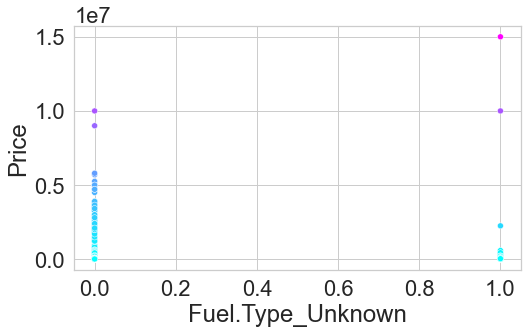

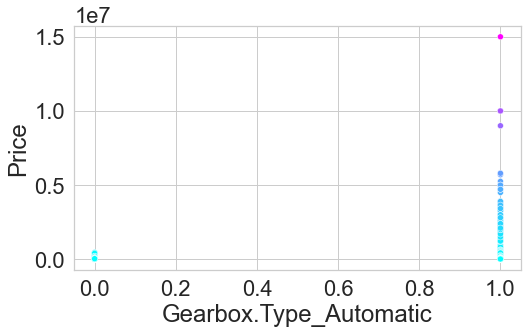

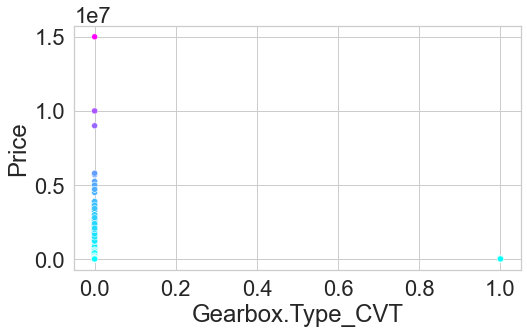

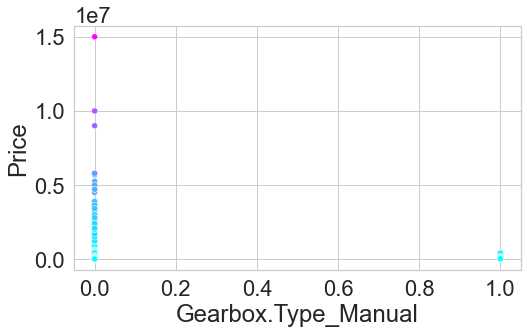

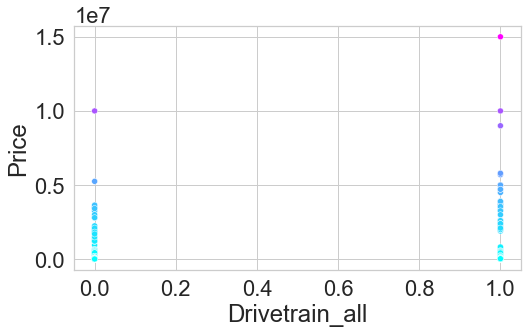

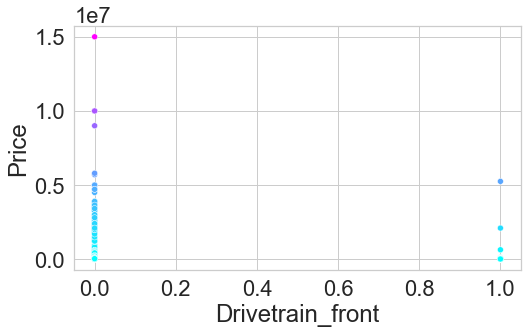

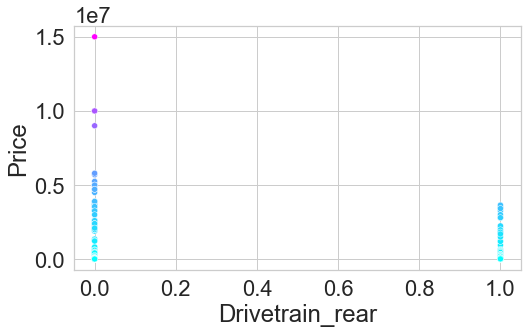

In [74]:
features = X.columns

for features in features:
    plt.figure(figsize=(8,4.5))
    sns.scatterplot(data=df_imputed, x=features, y='Price', hue='Price', palette='cool', legend=False)